<a href="https://colab.research.google.com/github/Henil21/Tumor_detecton_CNN/blob/main/Tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import zipfile
# import gzip
# !wget https://github.com/Henil21/Data_set/blob/main/Tumor_MRI.zip

ref=zipfile.ZipFile("/content/drive/MyDrive/Dataset/Tumor_MRI.zip")


In [59]:
# ref=zipfile.ZipFile("/content/Tumor_MRI.zip")
ref.extractall()
ref.close()

In [60]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def view_random_image(target_dir,target_class):
  # setup the target directory (we will view images from here)
  target_folder=target_dir+target_class

  # get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  # Read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.axis("off");
  print(f"img shape:{img.shape}")
  
  return img

['46 no.jpg']
img shape:(530, 380, 3)
['Y60.jpg']
img shape:(255, 197, 3)


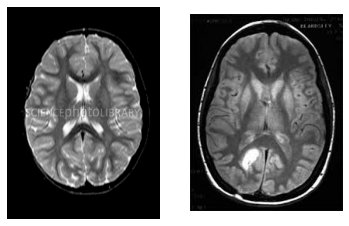

In [61]:
import matplotlib.pyplot as plt
import random
plt.subplot(1,2,1)
no=view_random_image("Tumor_MRI/brain_tumor_dataset/","no")
plt.subplot(1,2,2)
yes=view_random_image("Tumor_MRI/brain_tumor_dataset/","yes")

In [62]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen=ImageDataGenerator(rescale=1/255)
brain_tumor='/content/Tumor_MRI/brain_tumor_dataset'
train_data=train_data_gen.flow_from_directory(brain_tumor,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
model_1=Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),

    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model_1.compile(loss='binary_crossentropy',
                optimizer=Adam(0.01),
                metrics=['accuracy'])
history=model_1.fit(train_data,
                   epochs=5,
                   steps_per_epoch=len(train_data))

Found 310 images belonging to 2 classes.
Epoch 1/5
10/10 [==============================] - 10s 943ms/step - loss: 0.9134 - accuracy: 0.6645
Epoch 2/5
10/10 [==============================] - 10s 961ms/step - loss: 0.5340 - accuracy: 0.7645
Epoch 3/5
10/10 [==============================] - 9s 924ms/step - loss: 0.4215 - accuracy: 0.8032
Epoch 4/5
10/10 [==============================] - 9s 926ms/step - loss: 0.3174 - accuracy: 0.8710
Epoch 5/5
10/10 [==============================] - 9s 919ms/step - loss: 0.2118 - accuracy: 0.9258


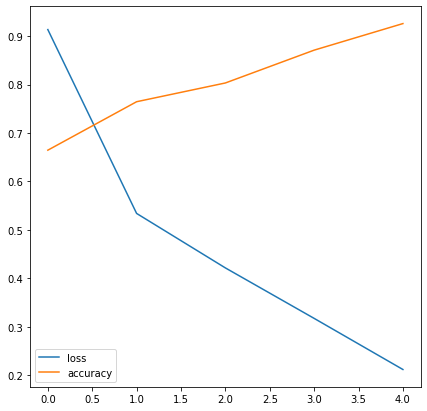

In [63]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(7,7))

In [64]:
 model_1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 flatten_9 (Flatten)         (None, 27040)           

In [65]:
# Lets create a helper function to preprocess it 
import tensorflow as tf
def load_prep_img(filename,img_shape=224):
  """
  Reads an image from filename  turns it into 
  tensor and reshapes it tp(img_shape,img_shape,colour_channel)
  """ 
  # read in the image
  img=tf.io.read_file(filename)
  # Decode the read file into a tensor
  img=tf.image.decode_image(img)
  # resize the image
  img=tf.image.resize(img,size=[img_shape,img_shape])
  # Rescale the image (get all values between 0 and 1)
  img=img/225
  return img

In [66]:
pre=load_prep_img('/content/drive/MyDrive/Dataset/images.jpg')
# pre=pre.reshape(224,224,3)
predic=model_1.predict(tf.expand_dims(pre,axis=0))
# pre.shape

1/1 [==============================] - 0s 78ms/step


In [67]:
import numpy as np
import pathlib
data_dir=pathlib.Path("Tumor_MRI/brain_tumor_dataset/")

class_name=class_name=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_name

array(['no', 'yes'], dtype='<U3')

In [68]:
pred_class=class_name[int(tf.round(predic))]
pred_class

'yes'